# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">06 Cluster Analysis in Python</h1>

You have probably come across Google News, which automatically groups similar news articles under a topic. Have you ever wondered what process runs in the background to arrive at these groups? In this course, you will be introduced to unsupervised learning through clustering using the SciPy library in Python. This course covers pre-processing of data and application of hierarchical and k-means clustering. Through the course, you will explore player statistics from a popular football video game, FIFA 18. After completing the course, you will be able to quickly apply various clustering algorithms on data, visualize the clusters formed and analyze results.

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Introduction to Clustering](#1)
    - Unsupervised learning: Basics
    - Basics of cluster analysis
    - Data preparation for cluster analysis

* [2. Hierarchical Clustering](#2) 
    - Basics of hierarchical clustering
    - Visualize clusters
    - How many clusters?
    - Limitations of hierarchical clustering
    
* [3. K-Means Clustering](#3)
    - Basics of k_means clustering
    - How many clusters?
    - Limitations of k-means clustering
    
* [4. Clustering in Real World](#4)
    - Dominant colors in images
    - Document clustering
    - Clustering with multiple features
    - Farewell

In [1]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the course datasets 
fifa = pd.read_csv('datasets/fifa_18_dataset.csv')
fifa_sample = pd.read_csv('datasets/fifa_18_sample_data.csv')
movies = pd.read_csv('datasets/movies_plot.csv')

In [2]:
fifa

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29
...,...,...
17989,10,16
17990,13,44
17991,14,26
17992,47,46


In [3]:
fifa_sample

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,True,False,False,False,False,False,False,False,False
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,False,False
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,False,False
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,False,False,True


In [4]:
movies

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...
...,...,...
995,Unknown Island,Adventure-seeker Ted Osborne (Phillip Reed) an...
996,Boss Nigger,"Upon finding a wagon under attack by bandits, ..."
997,Secret Command,The plot involves a U.S. effort to root out Na...
998,The Monolith Monsters,"In the desert outside of San Angelo, Californi..."


## <a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1. Introduction to Clustering</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Before you are ready to classify news articles, you need to be introduced to the basics of clustering. This chapter familiarizes you with a class of machine learning algorithms called unsupervised learning and then introduces you to clustering, one of the popular unsupervised learning algorithms. You will know about two popular clustering techniques - hierarchical clustering and k-means clustering. The chapter concludes with basic pre-processing steps before you start clustering data.

## 1 01 Unsupervised learning: basics

1. Unsupervised learning: basics

Hi everyone! Welcome to the video of this course. In this video, we will focus on unsupervised learning, business problems that are solved using such techniques and basic plotting of points that would help us later in the course! Let's get started.

2. Everyday example: Google news

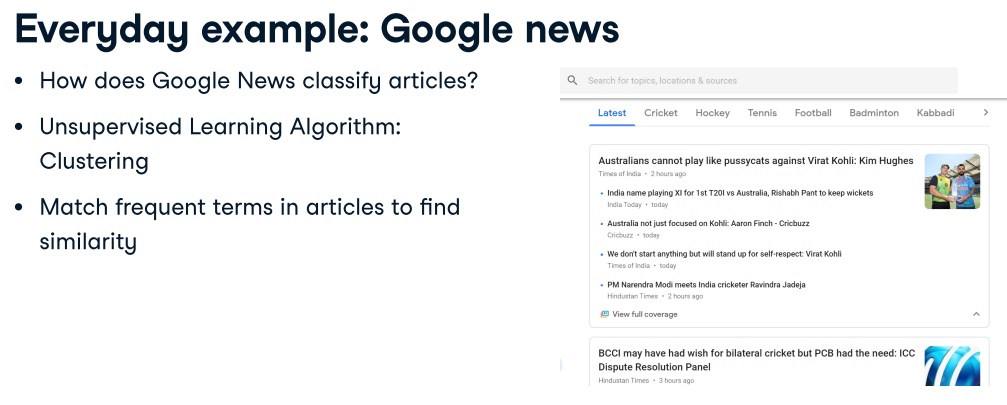

While browsing through Google News, have you wondered what goes behind grouping news items together? How does the algorithm decide which articles are similar? It is the result of an unsupervised learning algorithm. It scans through the text of each article and based on frequently occurring terms, groups articles together. The group of articles shown here is based on the Indian cricket team. Through this course, you will be introduced to various clustering techniques. Similar to this example, you will also perform document clustering on text.

3. Labeled and unlabeled data

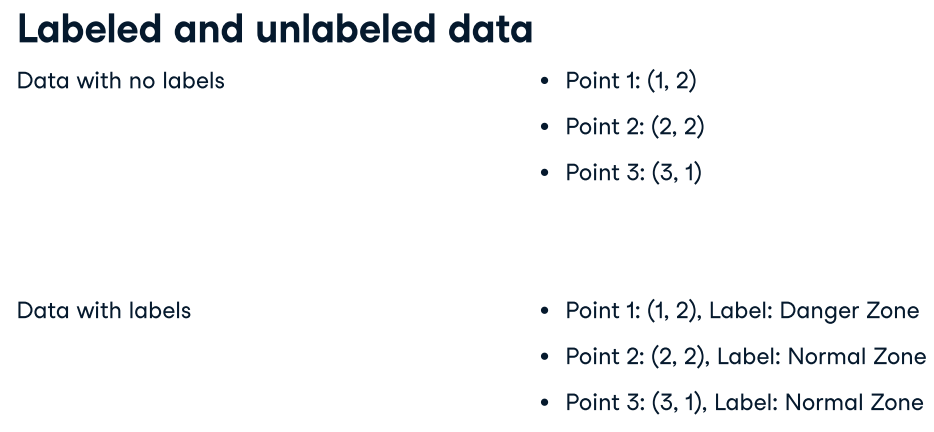

Before we define unsupervised learning, let us try to understand the terms: labeled and unlabeled data. Imagine you have a list of points with X and Y coordinates. If only the coordinates of the points are available and there is no other characteristic available to distinguish the data points, it is called unlabeled data. At the same time, if we associate each data point with a group beforehand, say normal and danger zones, we call it labeled data.

4. What is unsupervised learning?

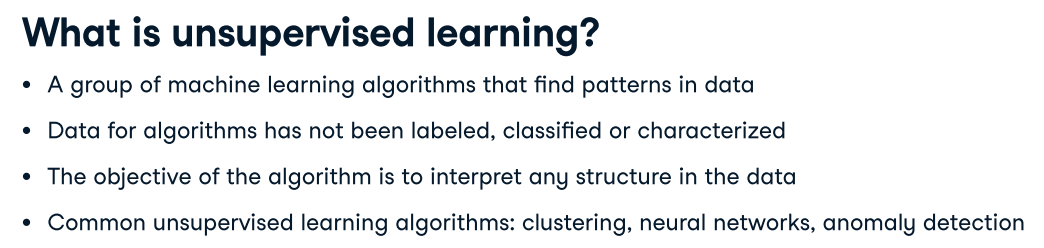

What is unsupervised learning? It is an umbrella term for a group of machine learning algorithms that are used to find patterns. The data that is used in these algorithms is not labeled, classified or characterized prior to running the algorithm. The algorithm is run, therefore, to find and explain inherent structures within the data. Common unsupervised learning algorithms are clustering, anomaly detections, and neural networks. Clustering is used to group similar data points together.

5. What is clustering?

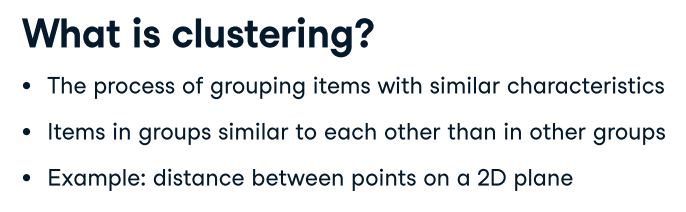

Let us now move on to a specific class of unsupervised learning algorithms. Clustering is the process of grouping items with similar characteristics. The groups so formed are such that items in a single group are closer to each other in terms of some characteristics as compared to items in other clusters. Clustering falls under the group of unsupervised learning algorithms as the data is not labeled, grouped or characterized beforehand. A simple example to demonstrate clustering would be to group points on a 2D plane based on their distance. Let us try to visualize it in Python.

6. Plotting data for clustering - Pokemon sightings

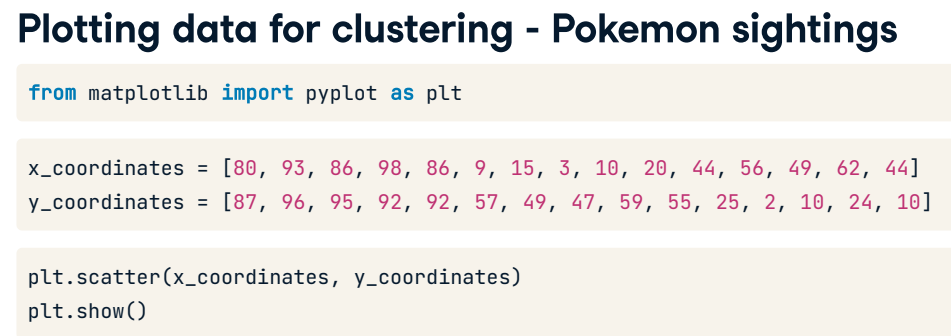

To make a scatter plot, we will use the pyplot class of the matplotlib library in Python. We will plot the sightings of Pokemon in a park in the form of coordinates. The first step, therefore, is to import the required class as plt. Next, we define the coordinates of points to be plotted in two lists - one each for x and y coordinates. In this case, we have fifteen sightings that we would like to plot. Finally, we use the scatter method of the pyplot class, with the lists for the coordinates as arguments and the plot method to display the plot. Let us see how the plot looks.

7. Plotting data for clustering - the scatter plot

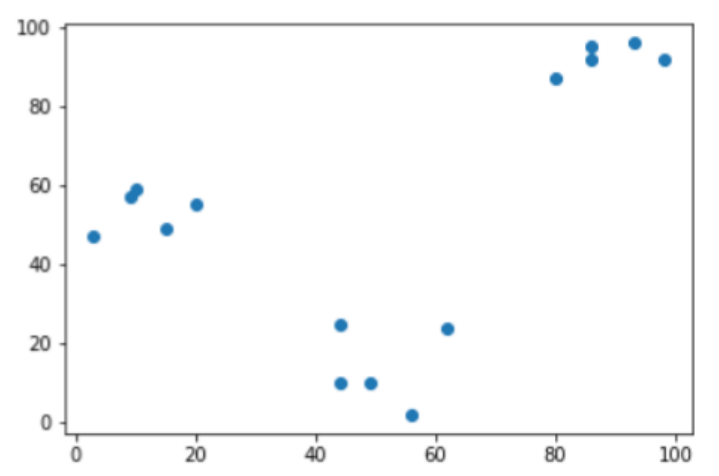

Here is how the plot looks like. As a preliminary analysis before you perform any clustering analysis on the points, visualizing helps you understand how many natural clusters are present in the data. There are three clusters in the data, which

8. Plotting data for clustering - clusters

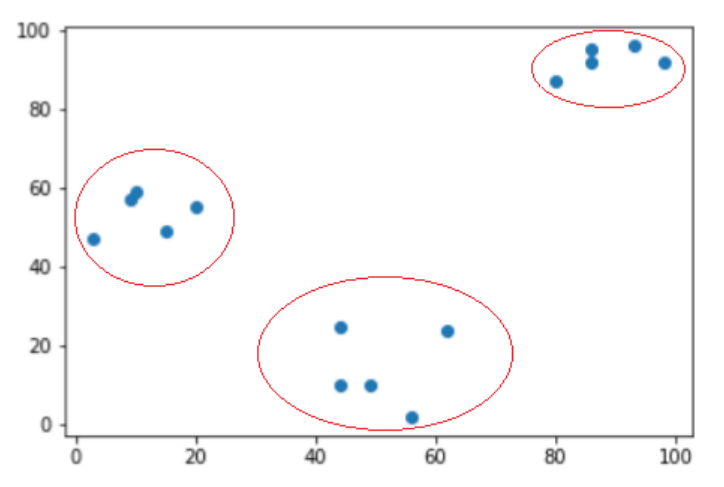

are highlighted in the plot. By visualizing this data, you can infer with some confidence where the Pokemon actually are!

9. Up next - some practice

Although this is a simplified case, real life problems may not have an obvious solution, and you may have to employ more analysis to decipher how many clusters there actually are, which you will learn later in the course. It is time for some exercises based on this video.

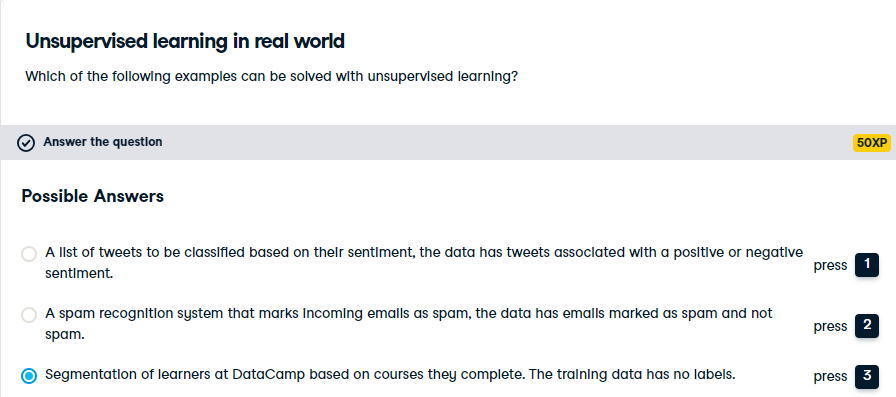

That is correct! As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data.

### Exercise

**Pokémon sightings**

There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively.

**Instructions**

- Import the pyplot class from matplotlib library as plt.
- Create a scatter plot using the pyplot class.
- Display the scatter plot created in the earlier step.

In [5]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

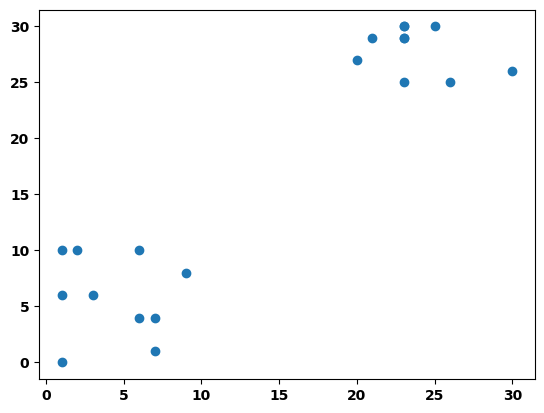

In [6]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

That is correct! Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## 1 02 Basics of cluster analysis

1. Basics of cluster analysis

Hello everyone! Now that you are familiar with unsupervised learning, let us move on to the basics of cluster analysis.

2. What is a cluster?

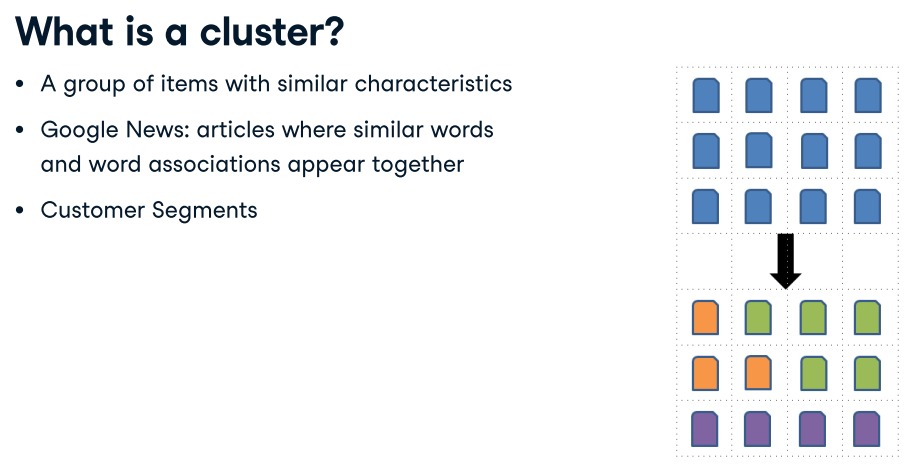

First, let us define a cluster. It is a group of items with similar characteristics. In the Google News example, a cluster of news articles has similar words and word associations appearing in them. Another example of clustering is segmentation of customers based on their spending habits. A cluster of customers would exhibit similar spending habits.

3. Clustering algorithms

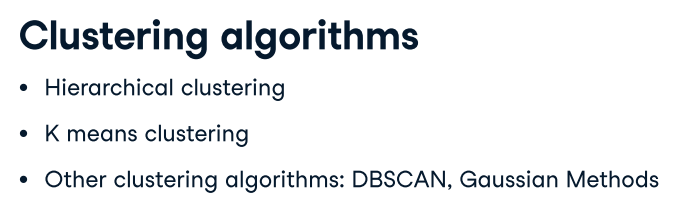

Although there are other algorithms like the density based DBSCAN technique or Gaussian models for cluster analysis, this course will focus only on the two most common techniques - hierarchical and k-means clustering.

4. Hierarchical clustering algorithm: Step 1

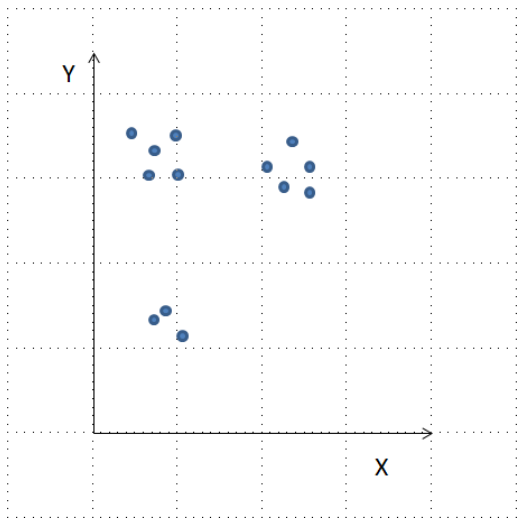

Let us look at the steps in hierarchical clustering before the implementation. For demonstration purposes, let us consider 13 points on a 2D plane.

5. Hierarchical clustering algorithm: Step 2

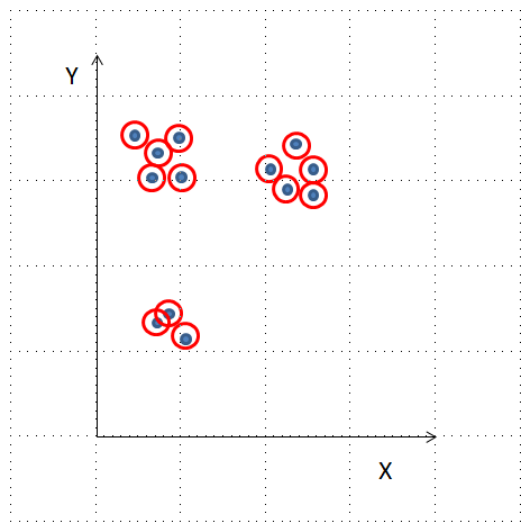

In the first step, all the points are considered as individual clusters. A cluster center is a mean of attributes of all data points in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates. At this stage, cluster centers of all clusters are the coordinates of the individual points.

6. Hierarchical clustering algorithm: Step 3

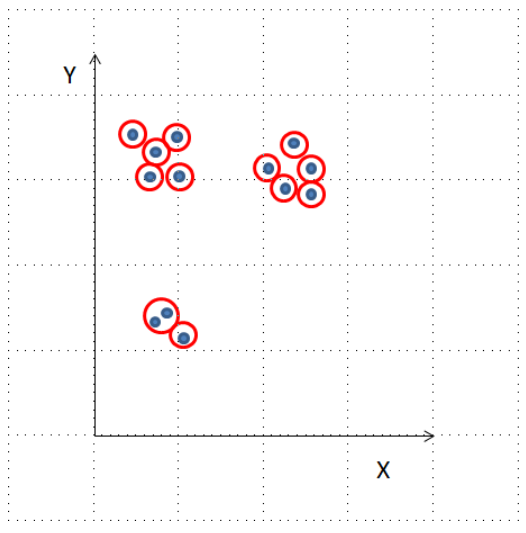

Next, the distances between all pairs of cluster centers are computed and the two closest clusters are merged. The cluster center of the merged cluster is then recomputed. In the example, two clusters on the bottom left have been merged. At this step, we are left with 12 clusters, one less than we started.

7. Hierarchical clustering algorithm: Step 4

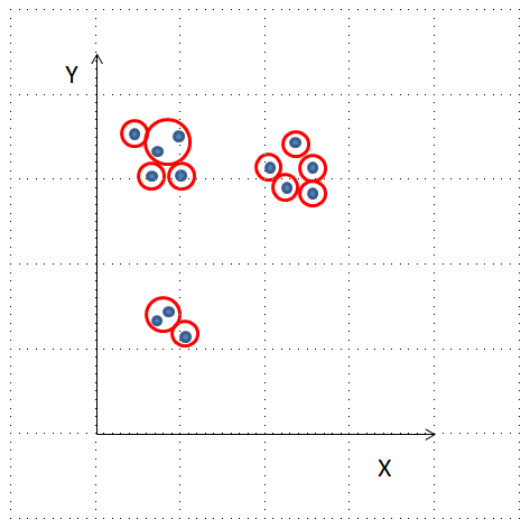

In the second step, the clusters with the closest cluster centers are merged on the top left. This process of merging the two closest clusters continues until we arrive at the desired clusters. At every step, the number of clusters reduces by one. As visible from the distribution of points, let us stop at three clusters.

8. Hierarchical clustering algorithm: Step 5

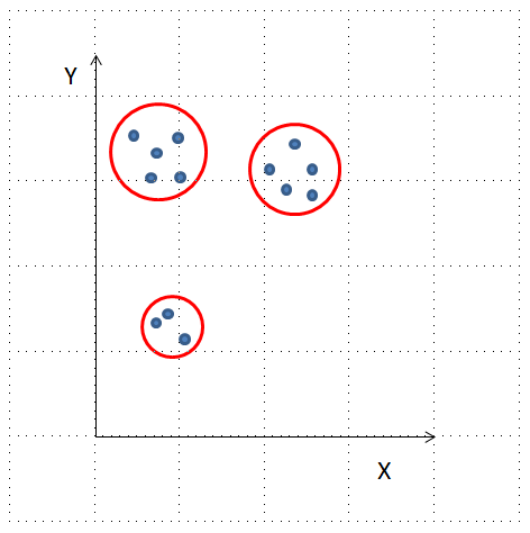

Finally, these are three clusters that you arrive at after the algorithm has run. Let us now look at its simple implementation in SciPy.

9. Hierarchical clustering in SciPy

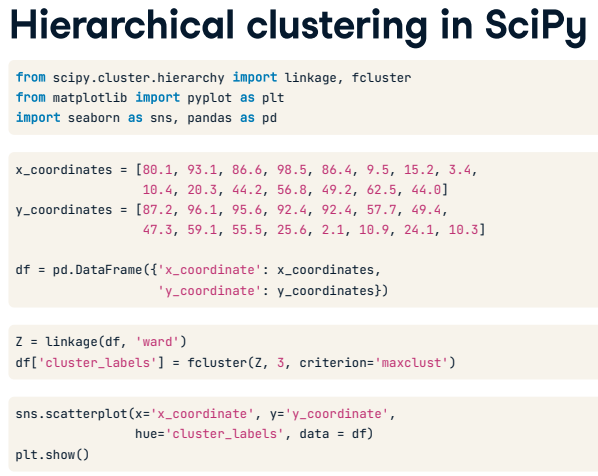

The required methods for hierarchical clustering, linkage and fcluster, are stored in scipy-dot-cluster-dot-hierarchy. We will explore the parameters of these methods later in the course. We additionally import pyplot and seaborn for visualization and pandas for data manipulation. A list of fifteen points with x and y coordinates is stored in a DataFrame. First, the linkage method computes distances between intermediate clusters. Next, the fcluster method generates clusters and assigns associated cluster labels to a new column in the DataFrame. Finally, we plot the points using seaborn with the cluster labels as the hue argument to associate clusters with different colors.

10. Hierarchical clustering results

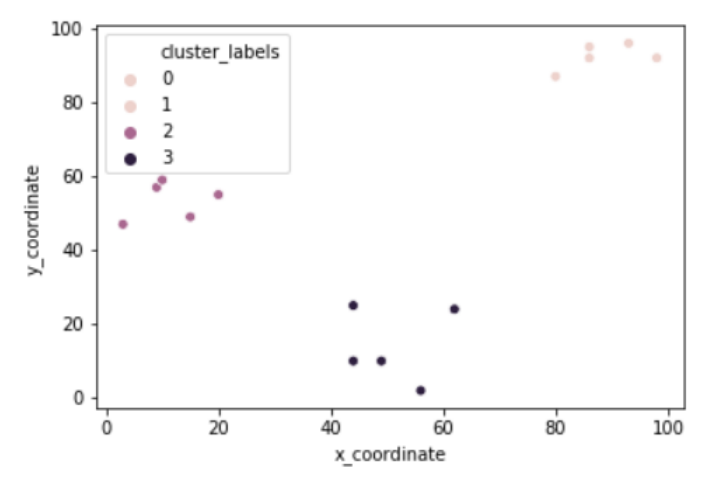

Here is the result of the seaborn scatterplot, showing the three clusters.

11. K-means clustering algorithm: Part 1

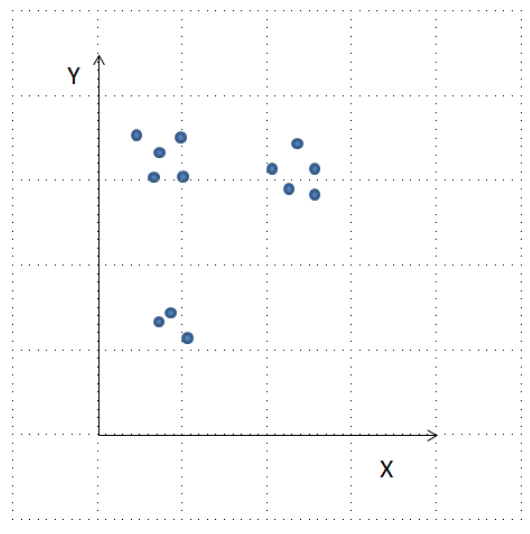

Next, we discuss the algorithm of k-means clustering with the same set of points to create three clusters.

12. K-means clustering algorithm: Part 2

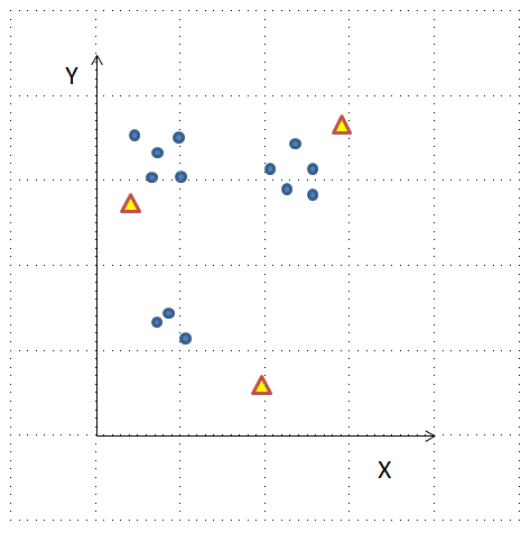

First, a random cluster center is generated for each of the three clusters.

13. K-means clustering algorithm: Part 3

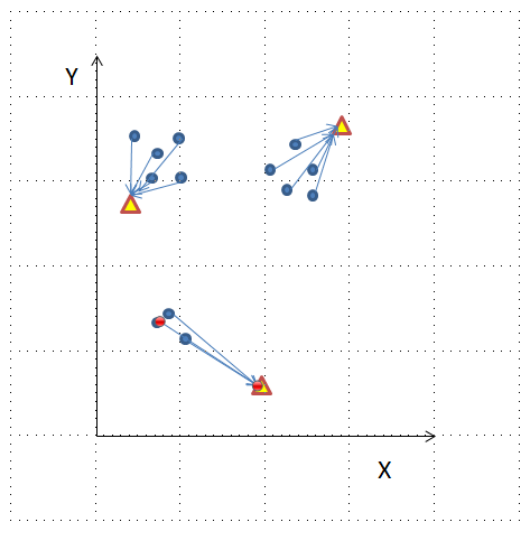

Next, the distance to these cluster centers is computed for each point to assign to the closest cluster.

14. K-means clustering algorithm: Part 4

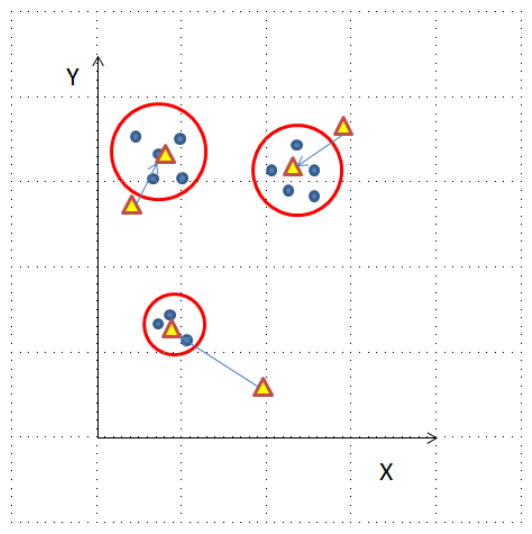

The cluster centers are recomputed. This iteration of assigning points to the recomputed cluster centers is performed a predefined number of times. Here, the clusters have been formed in the first iteration.

15. K-means clustering in SciPy

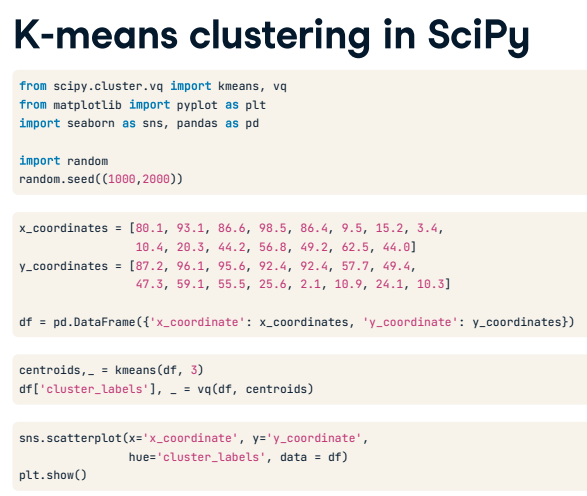

K-means clustering is implemented using methods kmeans and vq of scipy-dot-cluster-dot-vq. The centroids of the clusters are computed using kmeans and cluster assignments for each point are done through vq. The second argument in both methods is distortion, which we capture in a dummy variable. We will explore the parameters of these methods later in the course. Finally, we plot the clusters using seaborn.

16. K-means clustering results

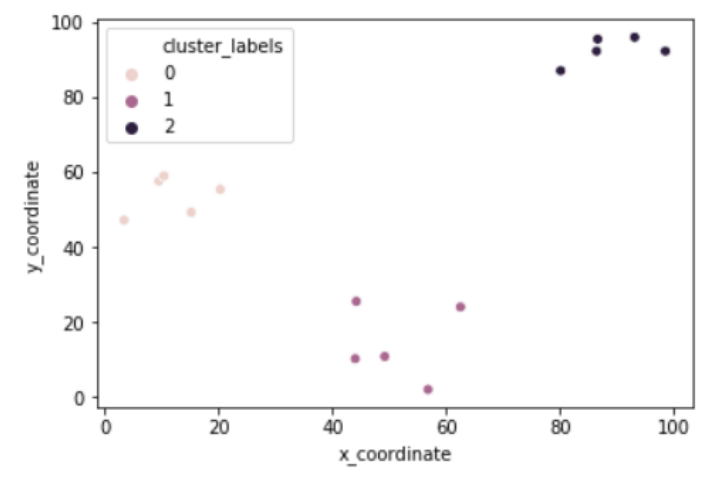

Here is the resulting plot.

17. Next up: hands-on exercises

Let us try some exercises now.

### Exercise

**Pokémon sightings: hierarchical clustering**

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

**Instructions**

- Import the linkage and fcluster libraries.
- Use the linkage() function to compute distances using the ward method.
- Generate cluster labels for each data point with two clusters using the fcluster() function.
- Plot the points with seaborn and assign a different color to each cluster.

In [7]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

In [8]:
df = pd.DataFrame({"x":x,
                   "y":y})
df

,x,y
0,9,8
1,6,4
2,2,10
3,3,6
4,1,0
5,7,4
6,1,10
7,6,10
8,1,6
9,7,1


In [9]:
df["x"]=df["x"].astype("float")
df["y"]=df["y"].astype("float")

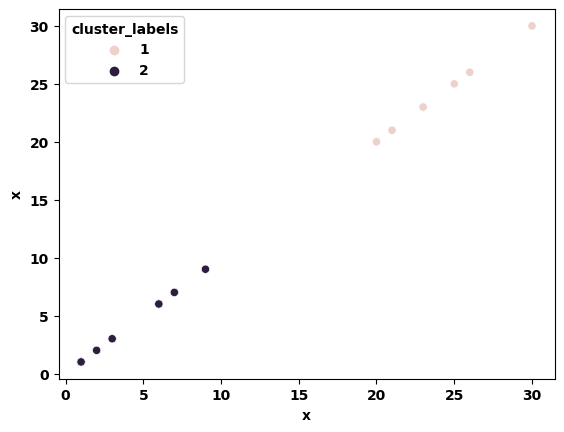

In [10]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x="x", y="x", hue="cluster_labels", data=df)
plt.show()

You are correct! Notice that the cluster labels are plotted with different colors.

### Exercise

**Pokémon sightings: k-means clustering**

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

**Instructions**

- Import the kmeans and vq functions.
- Use the kmeans() function to compute cluster centers by defining two clusters.
- Assign cluster labels to each data point using vq() function.
- Plot the points with seaborn and assign a different color to each cluster

In [11]:
df

,x,y,cluster_labels
0,9.0,8.0,2
1,6.0,4.0,2
2,2.0,10.0,2
3,3.0,6.0,2
4,1.0,0.0,2
5,7.0,4.0,2
6,1.0,10.0,2
7,6.0,10.0,2
8,1.0,6.0,2
9,7.0,1.0,2


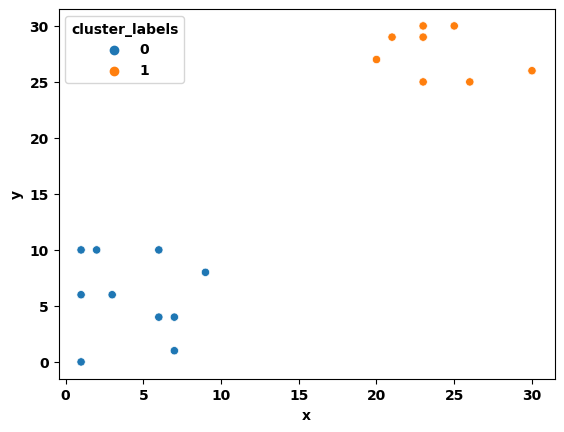

In [12]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x="x", y="y", hue="cluster_labels", data=df)
plt.show()

You are correct! Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different results later in the course.

1. Data preparation for cluster analysis

Hello everyone. Now that you are familiar with the two basic clustering techniques, let us discuss an important step in processing data that we should apply before performing clustering.

2. Why do we need to prepare data for clustering?

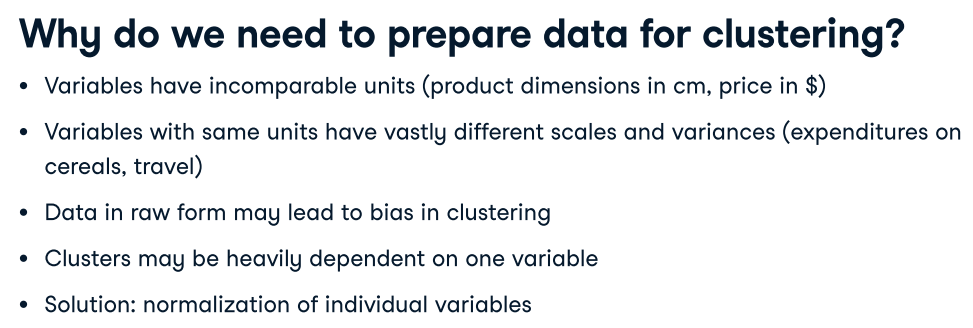

Why do we need to prepare data for clustering? Imagine a situation where you have a set of variables with incomparable units - such as the dimensions of a product and its price. Even if variables have the same unit, they may be significantly different in terms of their scales and variances. For instance, the amount that one may spend on an inexpensive item like cereals is low as compared to traveling expenses. If we use data in this raw form, the results of clustering may be biased. The clusters formed may be dependent on one variable significantly more than the other. How do we account for these issues, then? We use a process called normalization.

3. Normalization of data

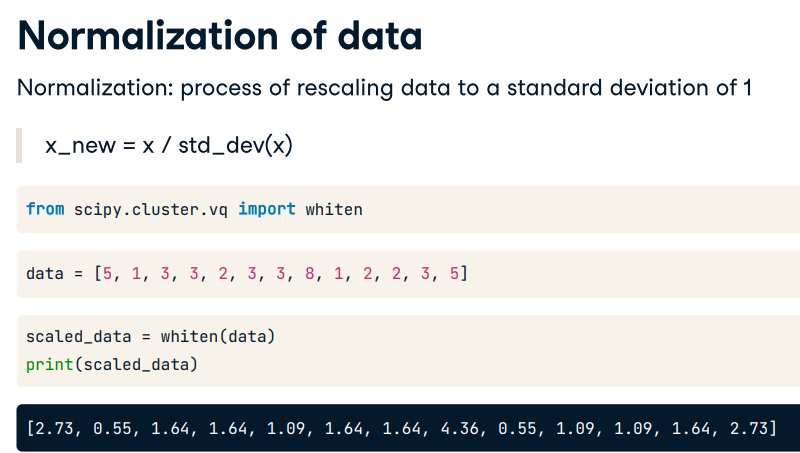

What is normalization of data? It is a process by which we rescale the values of a variable with respect to standard deviation of the data. The resultant standard deviation post normalization is 1. The process of normalization is simple and achieved through dividing a value by its standard deviation. Let us look at its implementation in Python. A normalization library is available on the SciPy package, using the whiten method of the vq class. First, we initiate the data to be normalized in a list and then use the whiten method, to transform. The array may be one or multi dimensional. Note that, in the example, we use a one dimensional list. In case of a multi dimensional array or list of lists, whiten divides each value by the standard deviation of the column. The result of the whiten method is an array of the same dimensions.

4. Illustration: normalization of data

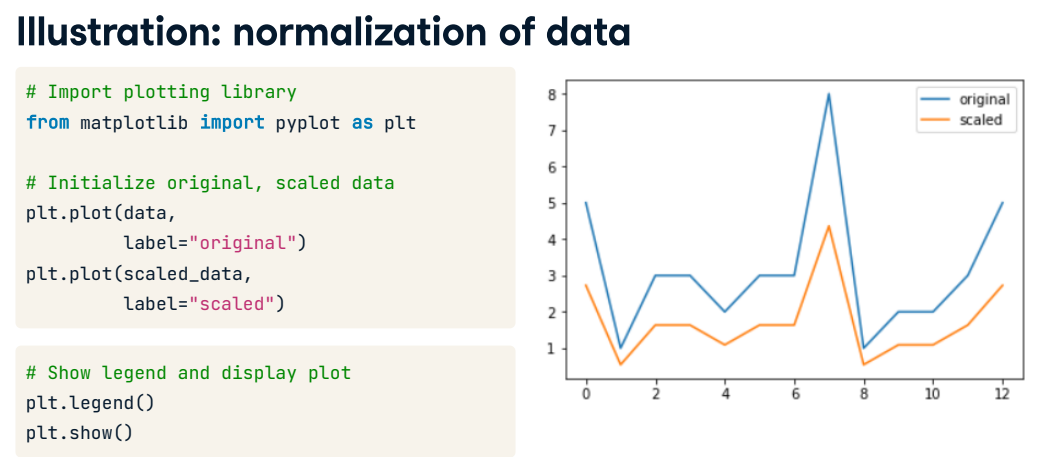

Let us look at a plot using the matplotlib library in Python to compare the results of the normalization process. First, you need import the pyplot class of the matplotlib library in Python. We initialized the two lists which contain the original and scaled data points. By default, pyplot plots line graphs. Next, we enable the legend in the graph and then display the plot. Let us see how the plot looks like. The original and scaled lists have been plotted in blue and orange colors, respectively. The serial number of the points is in the x axis, whereas the value of the original and scaled data points is in the y axis. As you can see, the variation in the scaled data has been toned down from the original data. Interestingly, the trends remain similar to the original data though.

5. Next up: some DIY exercises

With this, we come to the end of this demonstration. It is time for you get familiar with the normalization process by writing some code of your own.

### Exercise

**Normalize basic list data**

Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

**Instructions**

- Import the whiten function.
- Use the whiten() function to standardize the data.

In [13]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


That is right! Notice the scaled values have less variations in them. You will now visualize the data in the next exercise.

### Exercise

**Visualize normalized data**

After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, goals_for and scaled_data are already available to you.

**Instructions**

- Use the matplotlib library to plot the original and scaled data.
- Show the legend in the plot.
- Display the plot.

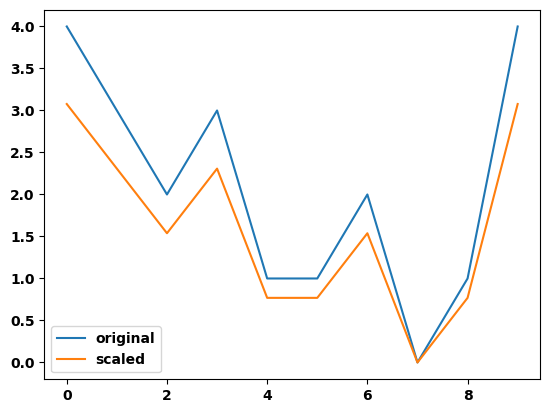

In [14]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

That is right! Notice the scaled values have lower variations in them.

### Exercise

**Normalization of small numbers**

In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.

**Instructions**

- Scale the list rate_cuts, which contains the changes in interest rates.
- Plot the original data against the scaled data.

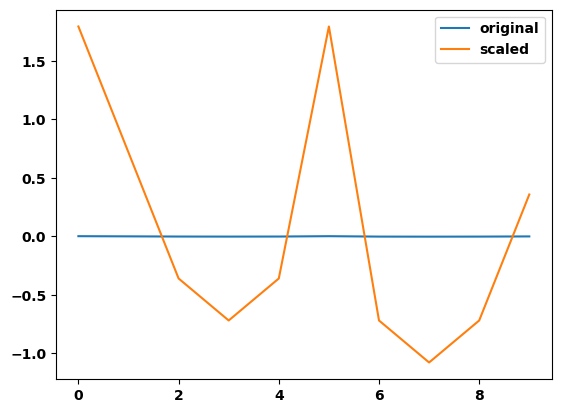

In [15]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

That is right! Notice how the changes in the original data are negligible as compared to the scaled data

### Exercise

**FIFA 18: Normalize data**

FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a pandas DataFrame, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

**Instructions**

- Scale the values of eur_wage and eur_value using the whiten() function.
----------
- Plot the scaled wages and transfer values of players using the .plot() method of pandas.
----------
- Check the mean and standard deviation of the scaled data using the .describe() method of pandas.

In [16]:
fifa_sample

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,True,False,False,False,False,False,False,False,False
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,False,False
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,False,False
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,False,False,True


In [17]:
fifa = fifa_sample[["eur_wage","eur_value"]].copy()
fifa

,eur_wage,eur_value
0,565000.0,95500000.0
1,565000.0,105000000.0
2,280000.0,123000000.0
3,510000.0,97000000.0
4,230000.0,61000000.0
...,...,...
995,31000.0,9000000.0
996,8000.0,8000000.0
997,9000.0,4300000.0
998,32000.0,7000000.0


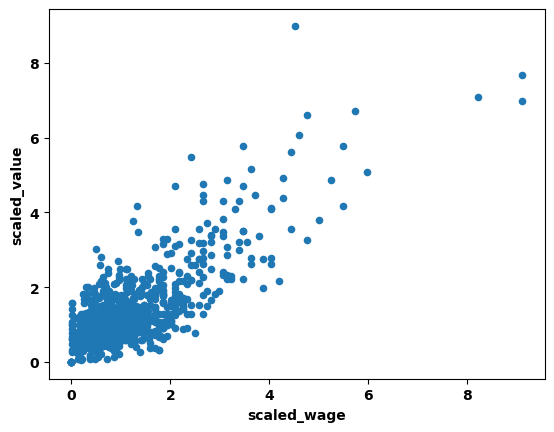

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [18]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa["eur_wage"])
fifa['scaled_value'] = whiten(fifa["eur_value"])


# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()


# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

That is right! As you can see the scaled values have a standard deviation of 1.

## <a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2. Hierarchical Clustering</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

This chapter focuses on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? The chapter concludes with a discussion on the limitations of hierarchical clustering and discusses considerations while using hierarchical clustering.

# 2 01 Basics of hierarchical clustering

1. Basics of hierarchical clustering

Hello everyone! In the previous chapter, you were introduced to the basics of two clustering algorithms. This chapter focuses on performing hierarchical clustering with SciPy. This video looks at the various parameters of the hierarchical clustering algorithm.

2. Creating a distance matrix using linkage

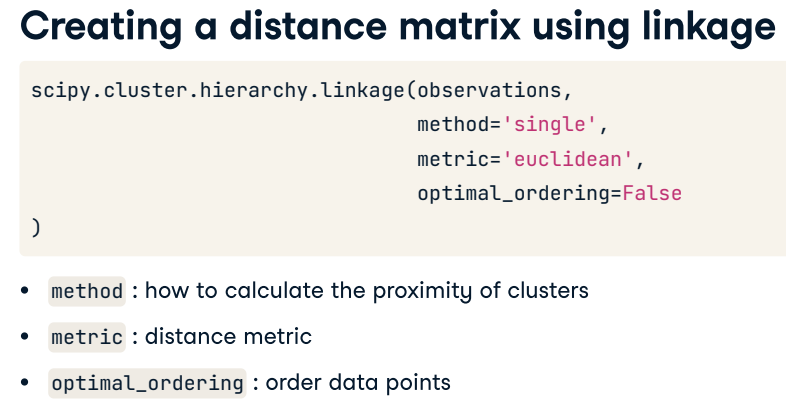

A critical step is to compute the distance matrix at each stage. This is achieved through the linkage method available in scipy-dot-cluster-dot-hierarchy. This process computes the distances between clusters as we go from N clusters to 1 cluster, where N is the number of points. There are four parameters for this method. The first parameter is the observations. The second parameter, method, tells the algorithm how to calculate proximity between two clusters. The metric is the function that decides the distance between two objects. Euclidean distance is a straight line distance between two points on a 2D plane. You can use your own function here. The optimal_ordering is an optional argument that changes the order of linkage matrix. We will not use this argument. Let us explore the method argument.

3. Which method should use?

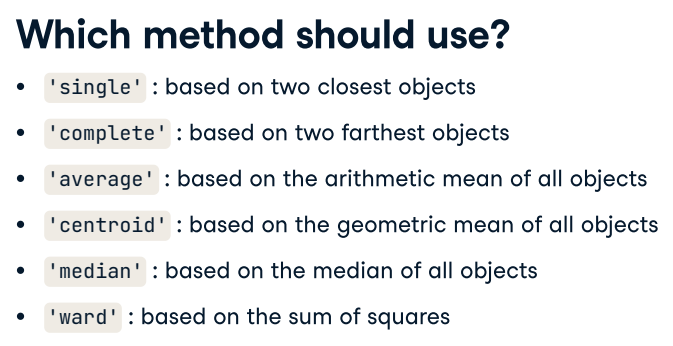

The second parameter, method, decides how clusters are separated at each step. This is the parameter that we will tweak in this lesson and see the differences. The single method decides the proximity of clusters based on their two closest objects. On the other extreme end, the complete method decides the proximity of cluster centers based on their two farthest objects. The average and centroid methods decide cluster proximities based on arithmetic and geometric means, respectively. The median method uses the median of cluster objects. Finally, the ward method that we used earlier computes cluster proximity using the difference between summed squares of their joint clusters minus the individual summed squares. The ward method focuses on clusters more concentric towards its center.

4. Create cluster labels with fcluster

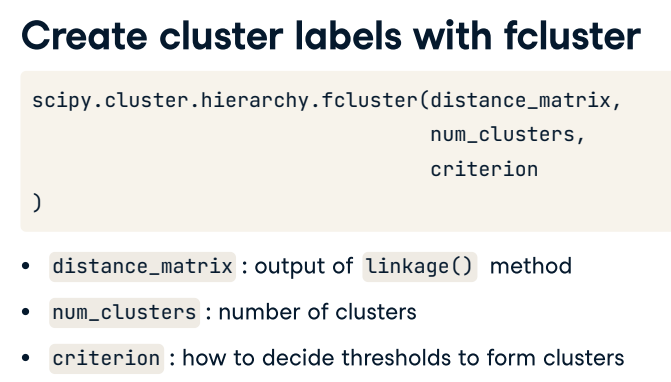

Once you have created the distance matrix, you can create the cluster labels through the fcluster method, which takes three arguments -the distance matrix, the number of clusters and the criteria to form the clusters based on certain thresholds. We will use the value of maxclust in the criterion argument.

5. Hierarchical clustering with ward method

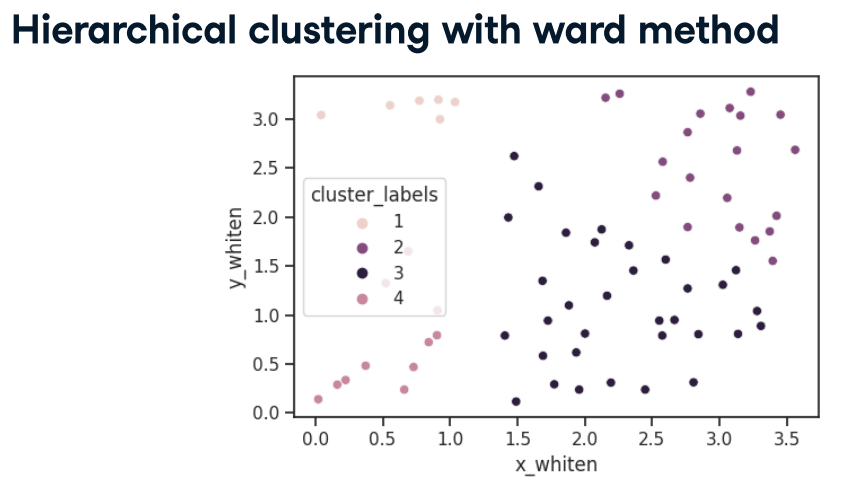

Let us try to understand the differences between various methods to perform hierarchical clustering on a list of points on a 2D plane. This is the result using the ward method. Notice that clusters are generally dense towards the centers.

6. Hierarchical clustering with single method

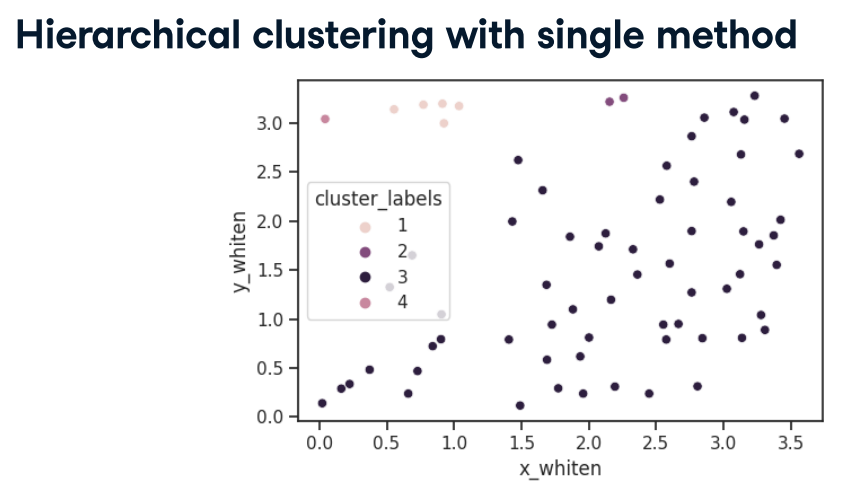

Next, we will use the single method to see how the clusters change. Recall the single method used the two closest objects between clusters to determine the inter-cluster proximity. Naturally, the clusters formed when performing clustering through this method are more dispersed. Although the top cluster, labeled 1, is roughly the same, most objects from cluster 3 have shifted to cluster 2.

7. Hierarchical clustering with complete method

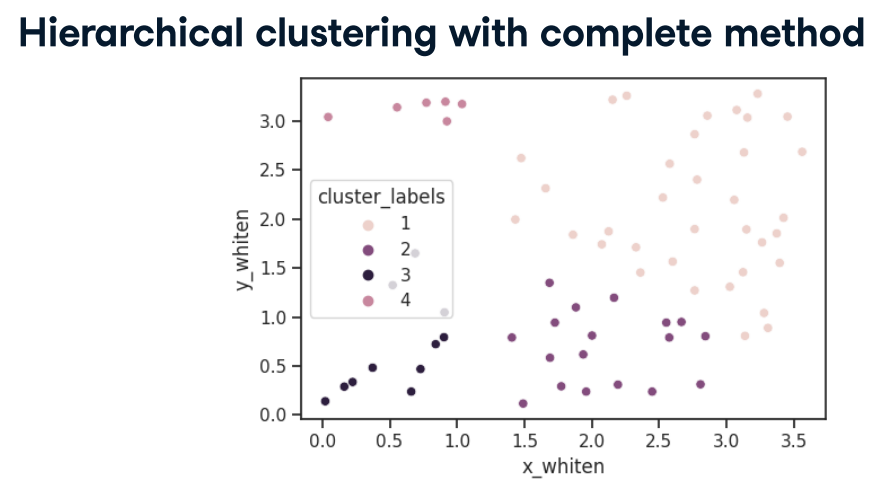

In the next and final iteration, we look at the clusters formed by the complete method. This method uses the two farthest objects among clusters to determine inter-cluster proximity. Coincidentally, though, the results of the complete method on the same data points that we used is similar to that of the ward method.

8. Final thoughts on selecting a method

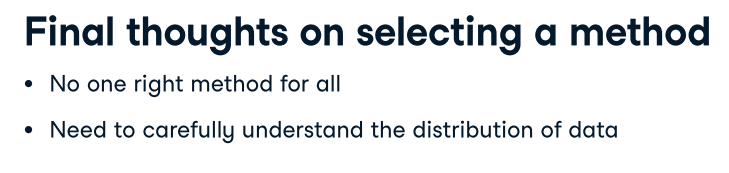

Here are a few thoughts before we complete this lesson. First, there is no right method that you can apply to all problems that you face. You would need to carefully study the data that you are going to handle to decide which method is right for your case, which falls outside the scope of this course.

9. Let's try some exercises

It is now time for you to try some exercises.

### Exercise

**Hierarchical clustering: ward method**

It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

**Instructions**

- Import fcluster and linkage from scipy.cluster.hierarchy.
- Use the ward method in the linkage() function.
- Assign cluster labels by forming 2 flat clusters from distance_matrix.
- Run the plotting code to see the results.

In [20]:
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92,
                91,22,23,25,25,27,17,17]
y_coordinate = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10,
                0, 10, 7, 17, 15]
x_sclaed = [0.5093490504878759, 0.59923417704456, 1.04865980982798, 0.419463923931192, 1.1085832275324359, 0.9887363921235239,
            0.419463923931192,  0.8988512655668399, 1.04865980982798, 0.5093490504878759, 0.32957879737450796, 0.629195885896788,
            0.389502215078964, 0.29961708852228, 2.426898417030468, 2.516783543587152, 2.606668670143836, 2.486821834734924,
            2.69655379670052, 2.9062857586661157, 2.8164006321094317, 2.6366303789960637, 2.666592087848292, 2.786438923257204,
            2.756477214404976, 2.4568601258826956, 2.426898417030468, 2.756477214404976, 2.7265155055527477, 0.6591575947490159,
            0.689119303601244, 0.7490427213056999, 0.7490427213056999, 0.8089661390101559, 0.5093490504878759, 0.5093490504878759]
y_sclaed = [0.0900098453652847, 0.13501476804792703, 0.0, 0.0, 0.0900098453652847, 0.06750738402396352, 0.022502461341321174,
            0.13501476804792703, 0.11251230670660586, 0.0900098453652847, 0.13501476804792703, 0.22502461341321173,
            0.1800196907305694, 0.22502461341321173, 2.182738750108154, 2.11523136608419, 2.227743672790796, 2.1377338274255115,
            2.1377338274255115, 2.182738750108154, 2.227743672790796, 2.227743672790796, 2.11523136608419, 2.227743672790796,
            2.0252215207189055, 2.205241211449475, 2.250246134132117, 2.092728904742869, 2.205241211449475, 0.3375369201198176,
            0.22502461341321173, 0.0, 0.22502461341321173, 0.15751722938924823, 0.38254184280245995, 0.3375369201198176]

In [32]:
comic_con = pd.DataFrame([x_coordinate,y_coordinate,x_sclaed,y_sclaed]).T
comic_con.rename(columns={0:"x_coordinate",1:"y_coordinate",2:"x_scaled",3:"y_scaled"}, inplace=True)
comic_con

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17.0,4.0,0.509349,0.090010
1,20.0,6.0,0.599234,0.135015
2,35.0,0.0,1.048660,0.000000
3,14.0,0.0,0.419464,0.000000
4,37.0,4.0,1.108583,0.090010
5,33.0,3.0,0.988736,0.067507
6,14.0,1.0,0.419464,0.022502
7,30.0,6.0,0.898851,0.135015
8,35.0,5.0,1.048660,0.112512
9,17.0,4.0,0.509349,0.090010


In [33]:
comic_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x_coordinate  36 non-null     float64
 1   y_coordinate  36 non-null     float64
 2   x_scaled      36 non-null     float64
 3   y_scaled      36 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


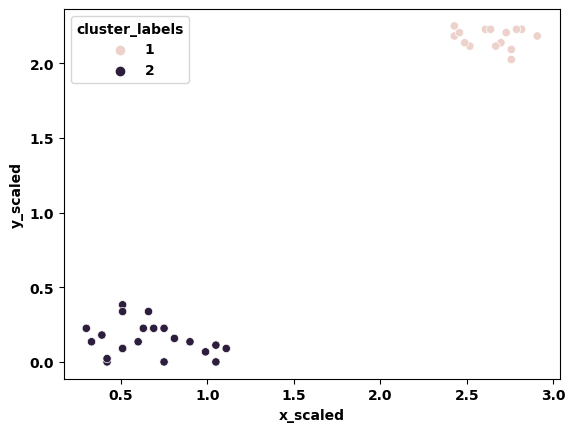

In [34]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                          method = "ward", 
                          metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 
                                       2, 
                                       criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

That is correct! Notice the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and the top right (an interesting stall).

### Exercise

**Hierarchical clustering: single method**

Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

**Instructions**

- Import fcluster and linkage from scipy.cluster.hierarchy.
- Use the single method in the linkage() function.

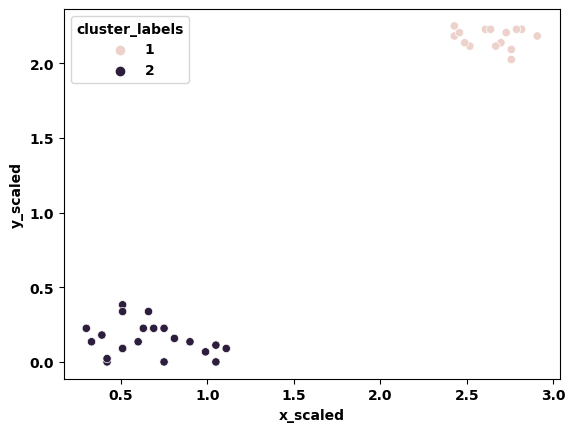

In [35]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], 
                          method = "single", 
                          metric = "euclidean")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 
                              2, 
                              criterion = "maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

That is correct! Notice that in this example, the clusters formed are not different from the ones created using the ward method.

### Exercise

**Hierarchical clustering: complete method**

For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

**Instructions**

- Import fcluster and linkage from scipy.cluster.hierarchy.
- Use the complete method in the .linkage() function.

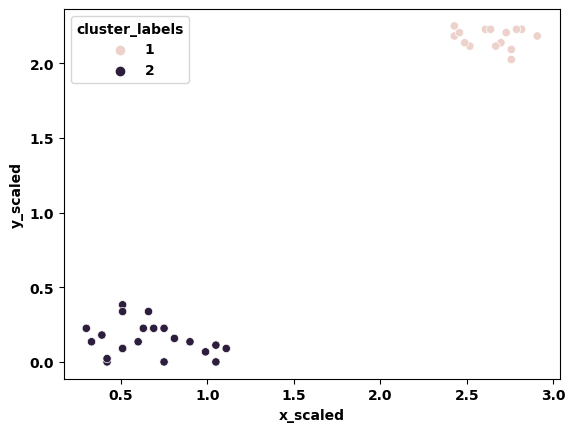

In [36]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[["x_scaled", "y_scaled"]], 
                          method = "complete", 
                          metric = "euclidean")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 
                              2, 
                              criterion = "maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

That is correct! Coincidentally, the clusters formed are not different from the ward or single methods. Next, let us learn how to visualize clusters.

## 2 02 Visualize clusters

1. Visualize clusters

Hi everyone! Now that you are familiar with hierarchical clustering and how the algorithm works, let us take a step in the direction of visualizing clusters.

2. Why visualize clusters?

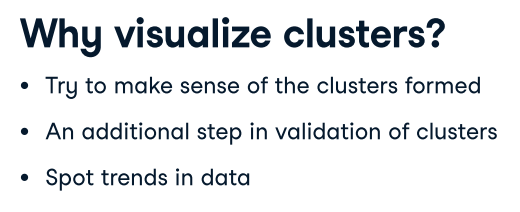

Why do we need to visualize clusters? One can quickly make sense of the clusters formed by any algorithm by visually analyzing it rather than just looking at cluster centers. It can serve as an additional step for validation of clusters formed. Additionally, you may also spot trends in your data by visually going through it. Let us now look at possible ways of visualizing the clusters that we have formed in our earlier exercise.

3. An introduction to seaborn

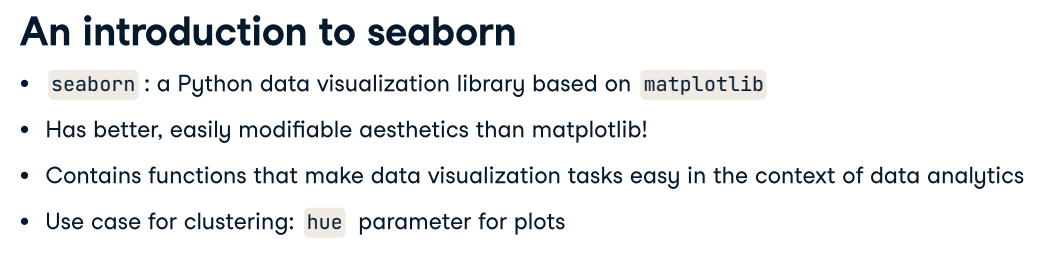

Seaborn is a data visualization library in Python that is based on matplotlib. It provides better default plotting themes, which can be easily and intuitively modified. It has functions for quick visualizations in the context of data analytics. In this course on clustering, we use pandas DataFrames to store our data, often adding a separate column for cluster centers. Seaborn provides an argument in its scatterplot method to allow us to use different colors for cluster labels to differentiate the clusters when visualizing them. Let us compare the implementation of the two plotting techniques - matplotlib and seaborn.

4. Visualize clusters with matplotlib

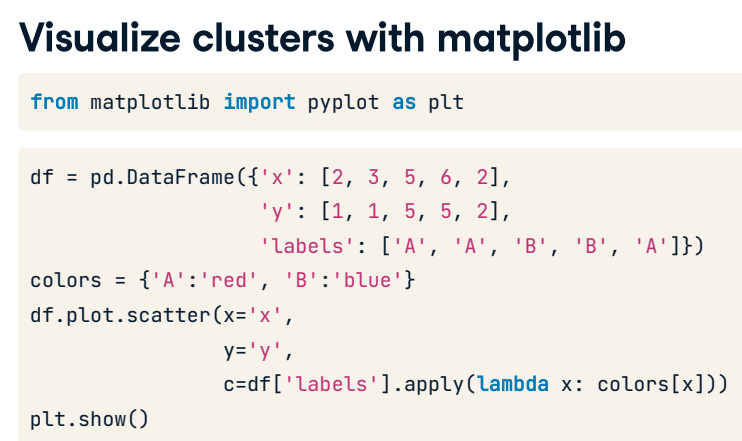

To visualize clusters, we first import the pyplot class in matplotlib. Let us start with a pandas DataFrame which has the columns - x, y and label for its x and y coordinates and cluster labels, A and B. We will use the c argument of the scatter method, to assign a color to each cluster. However, we first need to manually map each cluster to a color. Therefore, we define a dictionary named colors with the cluster labels as keys, and the color associated with the clusters as its values. We then pass a list of colors to c argument using a lambda function, which returns the corresponding value of each cluster label.

5. Visualize clusters with seaborn

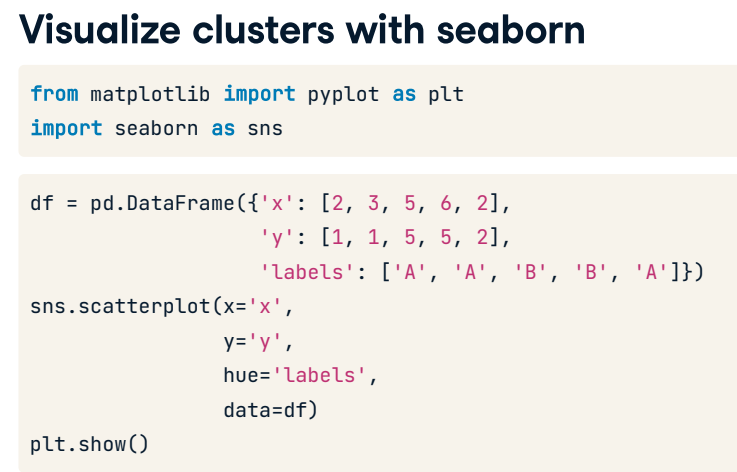

The implementation in seaborn is fairly straightforward with the built in scatterplot method. We first import the pyplot class and seaborn library. We use the same DataFrame as earlier to visualize the clusters. To visualize the data points with each point associated with a separate color, we use the hue argument of the scatterplot method, and pass on the column name of the cluster labels, which is labels in this example. Now that we have written the code for each of them, let us compare the results. Recall from the last lesson that seaborn shows an extra cluster with label 0 if the cluster labels are integers. In this example, we have manually assigned string cluster labels, so this issue will not arise.

6. Comparison of both methods of visualization

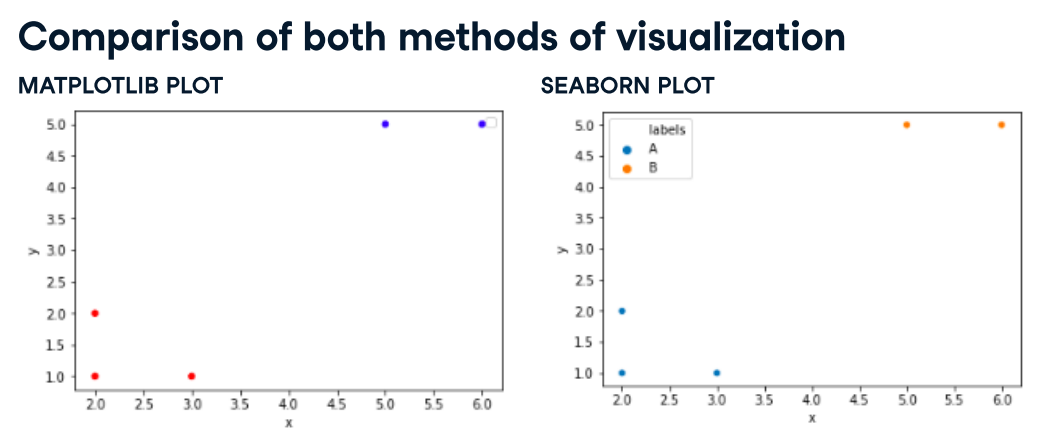

Although the results are comparable, there are two reasons why we prefer seaborn. First, the implementation using seaborn was more convenient once you have stored cluster labels in your DataFrame. Second, you do not need to manually select colors in seaborn as it would be using a default palette no matter how many clusters you have.

7. Next up: Try some visualizations

Now that you know how to visualize data using two libraries, let us try some exercises.

### Exercise

**Visualize clusters with matplotlib**

We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

**Instructions**

- Import the pyplot class from matplotlib module as plt.
- Define a colors dictionary for two cluster labels, 1 and 2.
- Plot a scatter plot with colors for each cluster as defined by the colors dictionary.

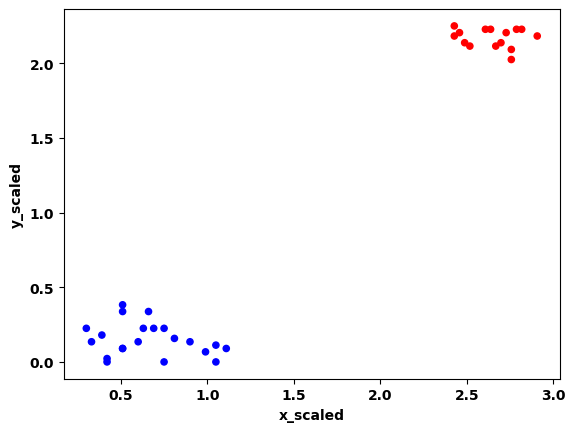

In [38]:
# Import the pyplot class
from matplotlib import pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x="x_scaled", 
                       y="y_scaled",
                       c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

That is correct! The two different clusters are shown in different colors.

### Exercise

**Visualize clusters with seaborn**

Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a pandas DataFrame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

**Instructions**

- Import the seaborn module as sns.
- Plot a scatter plot using the .scatterplot() method of seaborn, with the cluster labels as the hue argument.

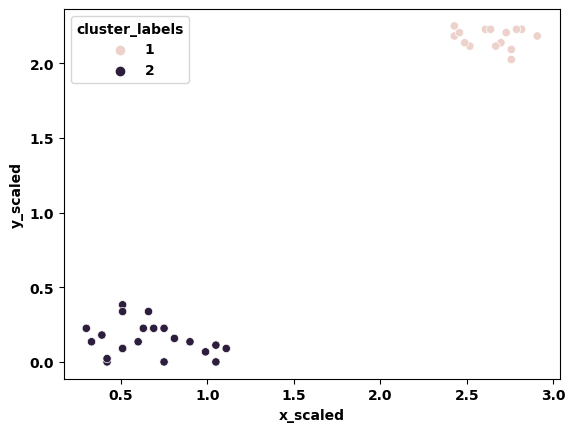

In [40]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data=comic_con)
plt.show()

That is correct! Notice the legend is automatically shown when using the hue argument.

## 2 03 How many clusters?

1. How many clusters?

Hi everyone! In this video, we will explore a way to decide how many clusters are present in our data.

2. Introduction to dendrograms

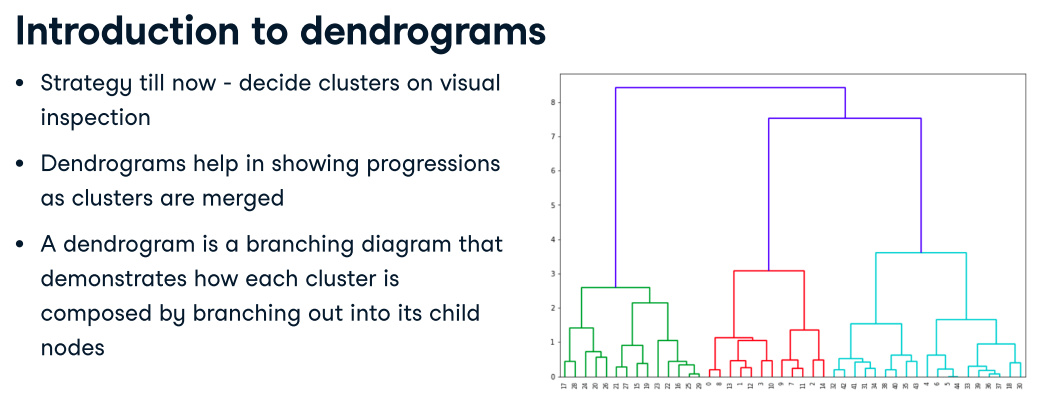

Up until this point, we have graphically looked at the number of points in our datasets to decide how many clusters to form. To decide on the number of clusters in hierarchical clustering, we can use a graphical diagram called the dendrogram. A dendrogram is a branching diagram that shows the progression in a linkage object as we proceed through the hierarchical clustering algorithm. Let us look at an example.

3. Create a dendrogram in SciPy

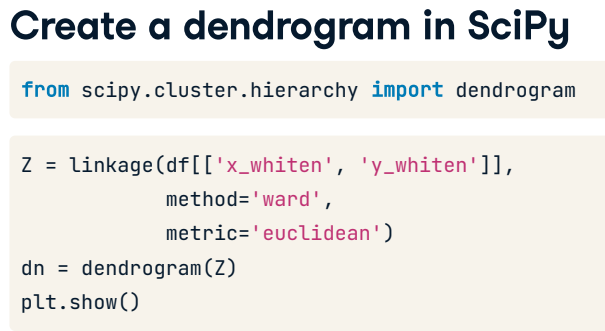

The first step in creating a dendrogram is to import the method from scipy-dot-cluster-dot-hierarchy. Next, we use the linkage method to create a distance matrix. Finally, we use the dendrogram method and provide the linkage object as an argument, and display the plot.

4. Dendrogram demonstration

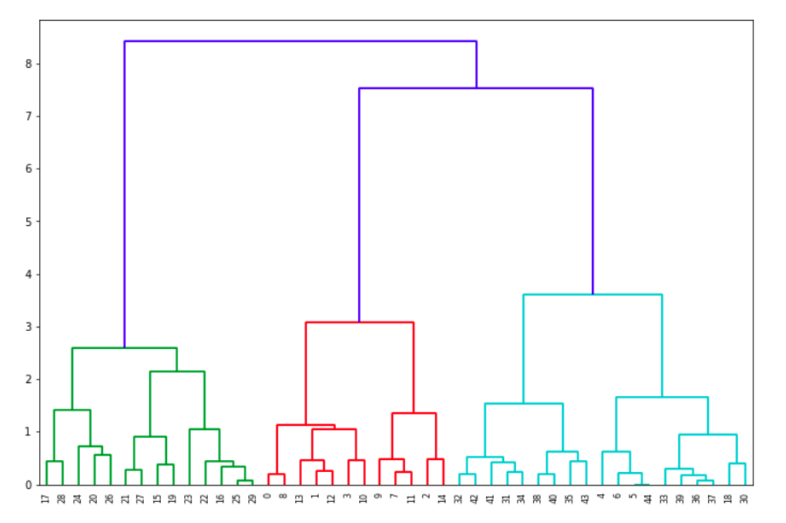

To understand the intricacies of a dendrogram, let us look at the dendrogram that has been generated and then make corresponding clusters. Recall the hierarchical clustering algorithm, where each step was a result of merging of two closest clusters in the earlier step. The x axis represents individual points, whereas the y axis represents the distance or dissimilarity between clusters. In the dendrogram, each inverted U represents a cluster divided into its two child clusters. The inverted U at the top of the figure represents a single cluster of all the data points. The width of the U shape represents the distance between the two child clusters. A wider U, therefore, means that the two child clusters were farther away from each other as compared to a narrower U in the diagram.

5. Dendrogram demonstration - 2

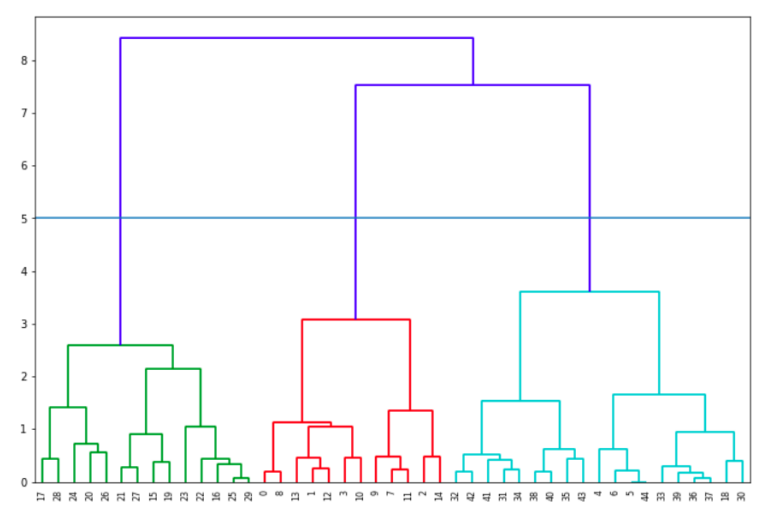

Now, if you draw a horizontal line at any part of the figure, the number of vertical lines it intersects tells you the number of clusters at that stage, and the distance between those vertical lines indicates the inter-cluster distance. At the horizontal line drawn on the figure, we see that there are three clusters. When you move the line below, the number of clusters increases but the inter-cluster distance decreases. This information helps us in deciding the number of clusters. For instance, even though we haven't looked at the distribution of the data points, it seems that the top three clusters have the highest distances between them. At this point, I must reiterate that there is no right metric to decide how many clusters are ideal. For instance, it looks like choosing three clusters should be ideal for this exercise. However, one's argument for two or four clusters may stand as well. Let us look at the results of each of these three cases.

6. Two clusters

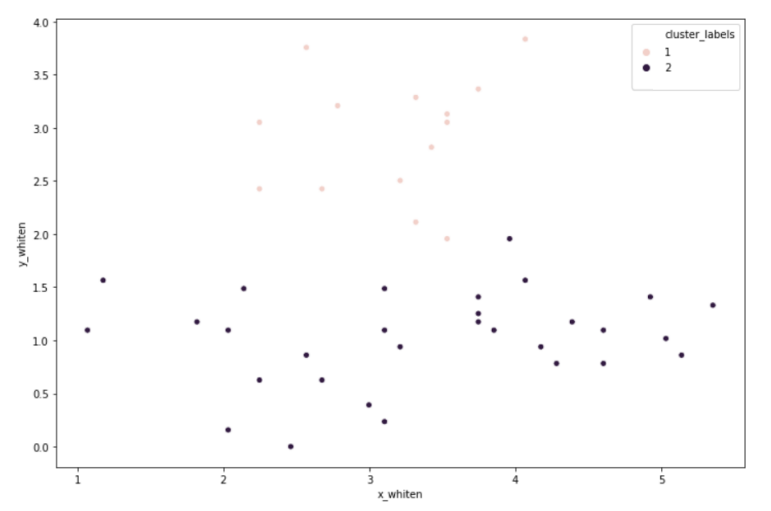

Here is the result of performing the clustering with two clusters.

7. Three clusters

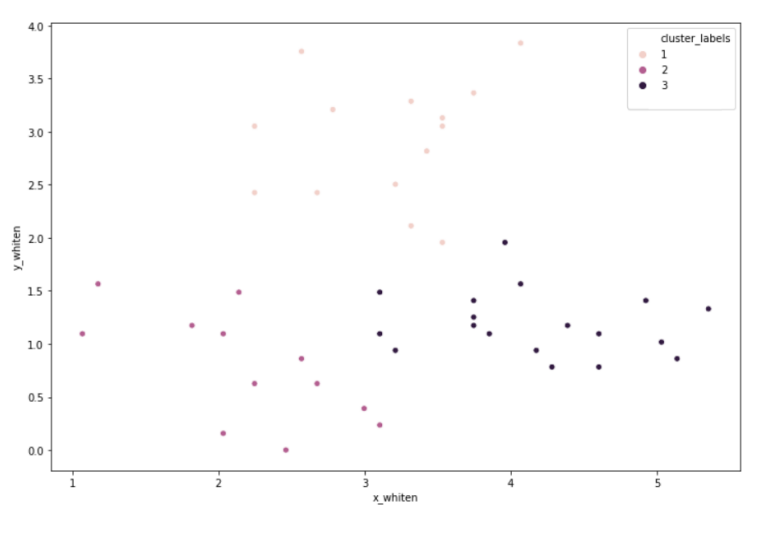

Here is the result with three clusters.

8. Four clusters

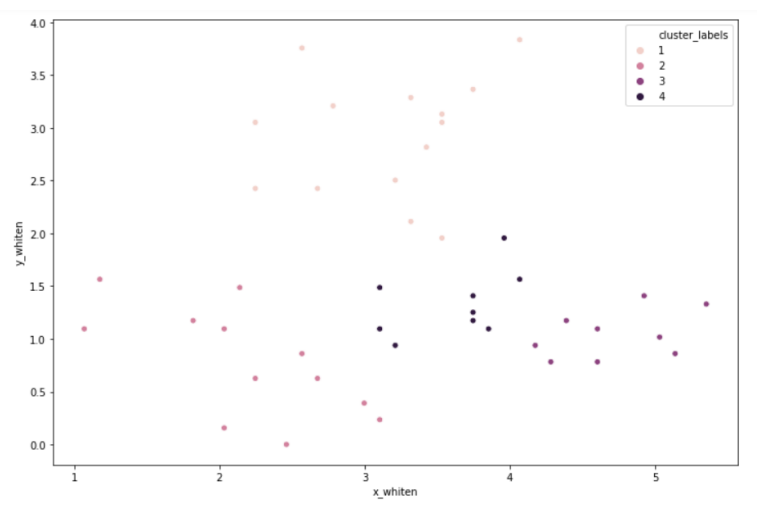

And here is how 4 clusters look on the data. Although the dendorgram indicated we could go ahead with three clusters, the case with four clusters makes sense too. Therefore, an additional check of visualizing the data may be performed before deciding on the number of clusters.

9. Next up - try some exercises

Now, let us try some exercises on how to decide the number of clusters using the dendrogram!

## <a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3. K-Means Clustering</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

## <a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4. Clustering in Real World</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.